In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models import RealNVP2D
import torch
from experiment import SmileyExperiment
from trixi.util import Config

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Flows in 2D


In [2]:
def sample_data():
    count = 100000
    rand = np.random.RandomState(0)
    a = [[-1.5, 2.5]] + rand.randn(count // 3, 2) * 0.2
    b = [[1.5, 2.5]] + rand.randn(count // 3, 2) * 0.2
    c = np.c_[2 * np.cos(np.linspace(0, np.pi, count // 3)),
    -np.sin(np.linspace(0, np.pi, count // 3))]
    c += rand.randn(*c.shape) * 0.2
    data_x = np.concatenate([a, b, c], axis=0)
    data_y = np.array([0] * len(a) + [1] * len(b) + [2] * len(c))
    perm = rand.permutation(len(data_x))
    return data_x[perm], data_y[perm]                        

In [3]:
test_data, test_targets = sample_data()


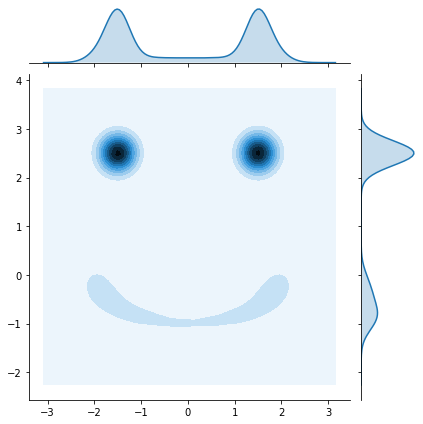

In [5]:
sns.jointplot(test_data[:, 0], test_data[:, 1], kind='kde')

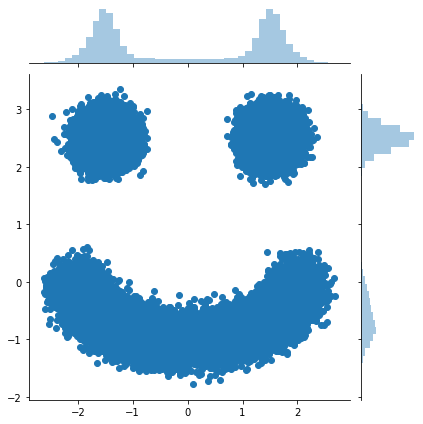

In [4]:
sns.jointplot(test_data[:, 0], test_data[:, 1])



# Evaluate the trained model


In [1]:
c = Config()

c.batch_size = 100
c.n_epochs = 10
c.learning_rate = 0.001
if torch.cuda.is_available():
    c.use_cuda = True
else:
    c.use_cuda = False
c.rnd_seed = 1
c.log_interval = 200

resume_dir = 'experiment_dir/20190813-104228_gauss'
exp = SmileyExperiment(c, name='test', n_epochs=c.n_epochs, seed=42, base_dir='experiment_dir',
                       resume=resume_dir, resume_save_types=['model'],
                       loggers={'visdom': ['visdom', {"exp_name": "myenv"}]})


NameError: name 'Config' is not defined

In [26]:
exp.setup()
exp._setup_internal()

Config:
{
    "base_dir": "experiment_dir",
    "batch_size": 200,
    "learning_rate": 0.001,
    "log_interval": 200,
    "n_coupling": 8,
    "n_epochs": 40,
    "name": "gauss",
    "prior": "gauss",
    "rnd_seed": 1,
    "seed": 42,
    "use_cuda": true
}
Experiment set up.
Loaded existing config from: experiment_dir/20190813-104228_gauss
Loaded existing checkpoint from: experiment_dir/20190813-104228_gauss/checkpoint/checkpoint_current.pth.tar


INFO:default-Z70l2TPUP1:Config:
INFO:default-Z70l2TPUP1:{
    "base_dir": "experiment_dir",
    "batch_size": 200,
    "learning_rate": 0.001,
    "log_interval": 200,
    "n_coupling": 8,
    "n_epochs": 40,
    "name": "gauss",
    "prior": "gauss",
    "rnd_seed": 1,
    "seed": 42,
    "use_cuda": true
}
INFO:default-Z70l2TPUP1:Experiment set up.
INFO:default-Z70l2TPUP1:Loaded existing config from: experiment_dir/20190813-104228_gauss
INFO:default-Z70l2TPUP1:Loaded existing checkpoint from: experiment_dir/20190813-104228_gauss/checkpoint/checkpoint_current.pth.tar


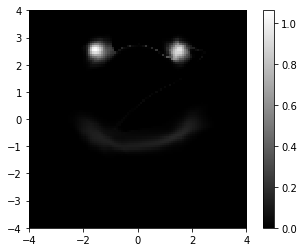

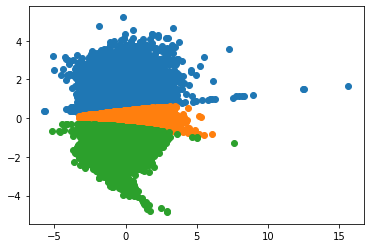

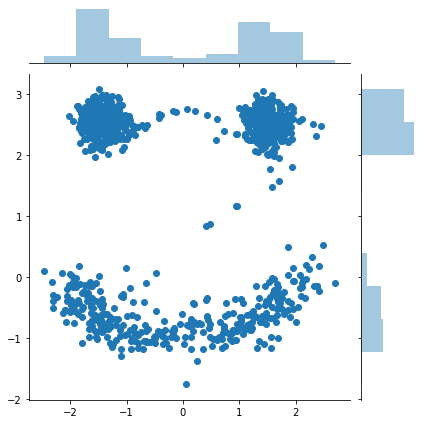

array([[-1.3810397 ,  2.3878276 ],
       [-1.6332273 ,  2.6628087 ],
       [-1.6064614 , -0.14920305],
       ...,
       [ 1.4474676 ,  2.2614682 ],
       [-1.2864202 ,  2.3654757 ],
       [-1.8126898 ,  2.4035914 ]], dtype=float32)

In [27]:
from deliverables import show_density_2d, display_latent_vars, display_samples

exp.model.eval()
exp.model.to('cpu')
d = torch.tensor(test_data, dtype=torch.float32)
show_density_2d(exp.model)
with torch.no_grad():
    z = exp.model(d)[0].detach()
display_latent_vars(z, test_targets)
display_samples(exp.model, 1000)